# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dellanda Firdauzi Ulwi
- **Email:** dellandafirdauz@gmail.com
- **ID Dicoding:** MC129D5X1534

## Menentukan Pertanyaan Bisnis

- Berapa total jumlah customer dalam dataset?
- Metode pembayaran apa yang paling sering digunakan?

## Import Semua Packages/Library yang Digunakan

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [76]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [77]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Berhasil menampilkan data customer dan data order payments

### Assessing Data

In [78]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [79]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [80]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Berhasil menampilkan data serta jumlah duplikasinya

### Cleaning Data

In [81]:
# Memeriksa jumlah entri duplikat sebelum proses penghapusan
jumlah_duplikat_sebelum = len(order_payments_df) - len(order_payments_df.drop_duplicates())
print(f"Total data duplikat sebelum dihapus: {jumlah_duplikat_sebelum}")

# Menghilangkan data yang terduplikasi secara langsung
order_payments_df_cleaned = order_payments_df.copy()
order_payments_df_cleaned.drop_duplicates(inplace=True)

# Mengevaluasi kembali jumlah data duplikat setelah pembersihan
jumlah_duplikat_sesudah = len(order_payments_df_cleaned) - len(order_payments_df_cleaned.drop_duplicates())
print(f"Total data duplikat setelah dihapus: {jumlah_duplikat_sesudah}")


Total data duplikat sebelum dihapus: 0
Total data duplikat setelah dihapus: 0


In [82]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [87]:
order_payments_df["payment_type"].isna()

,payment_type
0,False
1,False
2,False
3,False
4,False
...,...
103881,False
103882,False
103883,False
103884,False


In [88]:
order_payments_df["payment_type"].value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [90]:
order_payments_df.fillna(value="Prefer not to say", inplace=True)

In [91]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [93]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Tidak ada data yang terhapus karena sebelumnya jumlah duplikasi adalah 0

## Exploratory Data Analysis (EDA)

### Explore ...

In [112]:
print("Kolom dalam orders_df:", orders_df.columns)

Kolom dalam orders_df: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


In [113]:
# Pertama, gabungkan order_payments_df dengan orders_df
order_payments_orders_df = pd.merge(
    order_payments_df,
    orders_df,
    how="left",
    on="order_id"
)

# Kedua, gabungkan hasilnya dengan customers_df
order_payments_customers_df = pd.merge(
    order_payments_orders_df,
    customers_df,
    how="left",
    on="customer_id"
)

print(order_payments_customers_df.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value                       customer_id  \
0                     8          99.33  0a8556ac6be836b46b3e89920d59291c   
1                     1          24.39  f2c7fc58a9de810828715166c672f10a   
2                     1          65.71  25b14b69de0b6e184ae6fe2755e478f9   
3                     8         107.78  7a5d8efaaa1081f800628c30d2b0728f   
4                     2         128.45  15fd6fb8f8312dbb4674e4518d6fa3b3   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-04-25 22:01:49  2018-

In [114]:
order_payments_customers_df.to_csv("order_payments_customers_final.csv", index=False)
print("File berhasil disimpan sebagai 'order_payments_customers_final.csv'")

File berhasil disimpan sebagai 'order_payments_customers_final.csv'


**Insight:**
- Berhasil menampilkan data dan menggabungkan dari dataset berjumlah 2

## Visualization & Explanatory Analysis

### Pertanyaan 1:

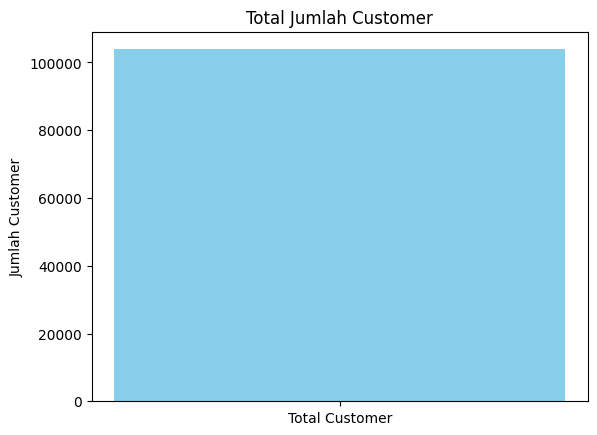

In [121]:
# Jumlah customer
total_customers = df["customer_id"].count()
plt.bar(["Total Customer"], [total_customers], color="skyblue")
plt.ylabel("Jumlah Customer")
plt.title("Total Jumlah Customer")
plt.show()

### Pertanyaan 2:

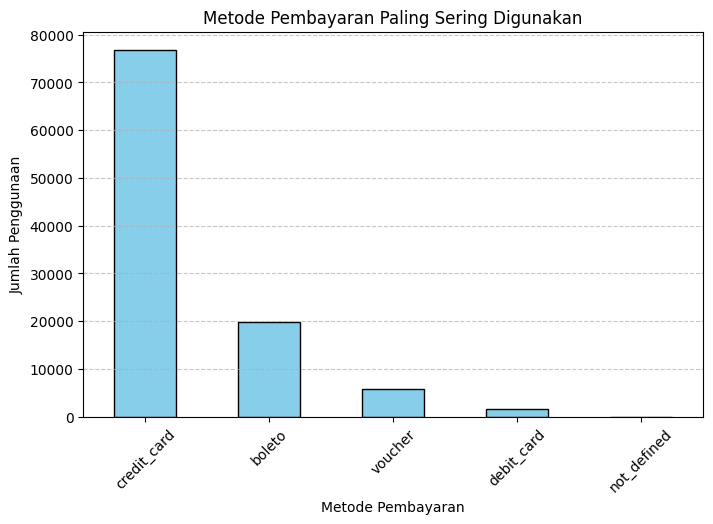

In [120]:
# Load dataset
file_path = "order_payments_customers_final.csv"
df = pd.read_csv(file_path)

# Menghitung jumlah penggunaan tiap metode pembayaran
payment_counts = df["payment_type"].value_counts()

# Membuat diagram batang
plt.figure(figsize=(8, 5))
payment_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Menambahkan judul dan label
plt.title("Metode Pembayaran Paling Sering Digunakan")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Penggunaan")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

**Insight:**
- Berhasil menampilkan data total jumlah customer dalam dataset adalah sekitar 99.440
- Berhasil menampilkan credit card sebagai metode pembayaran paling sering digunakan

## Analisis Lanjutan (Opsional)

## Conclusion

- Dataset menunjukkan bahwa terdapat sekitar 99.440 customer yang melakukan transaksi. Jumlah ini mencerminkan tingginya aktivitas pengguna dalam sistem pembayaran.
- Namun, mayoritas transaksi dilakukan menggunakan kartu kredit (credit_card) dengan hampir 80.000 transaksi, sementara metode lain seperti boleto, voucher, dan debit card digunakan jauh lebih sedikit. Hal ini menunjukkan bahwa customer lebih memilih pembayaran digital dengan kartu kredit dibandingkan metode lainnya.